[<pygad.nn.nn.DenseLayer object at 0x7fb1fbbdb610>, <pygad.nn.nn.DenseLayer object at 0x7fb1fbbdf190>, <pygad.nn.nn.DenseLayer object at 0x7fb1fbbdf290>, <pygad.nn.nn.DenseLayer object at 0x7fb1fbbdf350>, <pygad.nn.nn.DenseLayer object at 0x7fb1fbbdf410>]
[array([ 0.05488914,  0.07457812, -0.07975426, -0.02037464,  0.0881107 ,
        0.07655314,  0.01761683,  0.06922593]), array([-0.01123014, -0.06296274, -0.00967369, -0.01803878, -0.00384014,
       -0.0462732 , -0.03129333,  0.05043389]), array([-0.00941079,  0.01989246,  0.01244252, -0.04349824, -0.01889835,
       -0.08901552,  0.09479021,  0.02112617]), array([ 0.04485734,  0.06855675,  0.02520915, -0.04669098,  0.03903069,
       -0.03553489,  0.09515667,  0.05615892]), array([ 0.08810711,  0.00607954, -0.0450792 ,  0.07674305, -0.0441211 ,
       -0.05898674, -0.06946979,  0.06046657])]
Generation = 1
Accuracy   = 50.0
Generation = 2
Accuracy   = 50.0
Generation = 3
Accuracy   = 50.0
Generation = 4
Accuracy   = 50.0
Generation 

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from 


Accuracy   = 100.0
Generation = 42
Accuracy   = 100.0
Generation = 43
Accuracy   = 100.0
Generation = 44
Accuracy   = 100.0
Generation = 45
Accuracy   = 100.0
Generation = 46
Accuracy   = 100.0
Generation = 47
Accuracy   = 100.0
Generation = 48
Accuracy   = 100.0
Generation = 49
Accuracy   = 100.0
Generation = 50
Accuracy   = 100.0


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


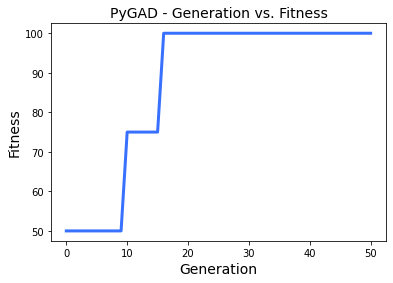

[ 0.49947988 -0.42101427  0.09564197 -0.90281616 -0.88166488  1.27269054
  1.13917509 -1.900312  ]
100.0
0
Predictions of the trained network : [0, 1, 1, 0]


In [3]:
import numpy
import pygad
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])


GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=2,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["sigmoid"],
                                output_activation="softmax")
print(GANN_instance.population_networks)


population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
print(population_vectors)


ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print(solution)
print(solution_fitness)
print(solution_idx)

predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                              problem_type="classification")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))



In [2]:
pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.3 MB/s 
